In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
def imshow(image, title=None):
    plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def showGridImage(images, labels, gSize=5, title=None):
    selectedIndex = np.random.choice(len(images), gSize*gSize, replace=False)
    fig, axes = plt.subplots(gSize,gSize, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [5]:
mainPath = './../week7/15Dec23/Image Classification/' # './image classification/Cars'
classes = os.listdir(mainPath)
images = []
labels = []
for cls in classes:
    folderPath = os.path.join(mainPath, cls)
    for imgName in os.listdir(folderPath):
        fullPath = os.path.join(folderPath, imgName)
        img = cv2.imread(fullPath,0)
        img = cv2.resize(img, (100,100))
        images.append(img.flatten())
        label = classes.index(cls)
        labels.append(label)

In [6]:
# import pandas as pd
# pd.DataFrame(images)

In [7]:
images = np.array(images)
labels = np.array(labels)

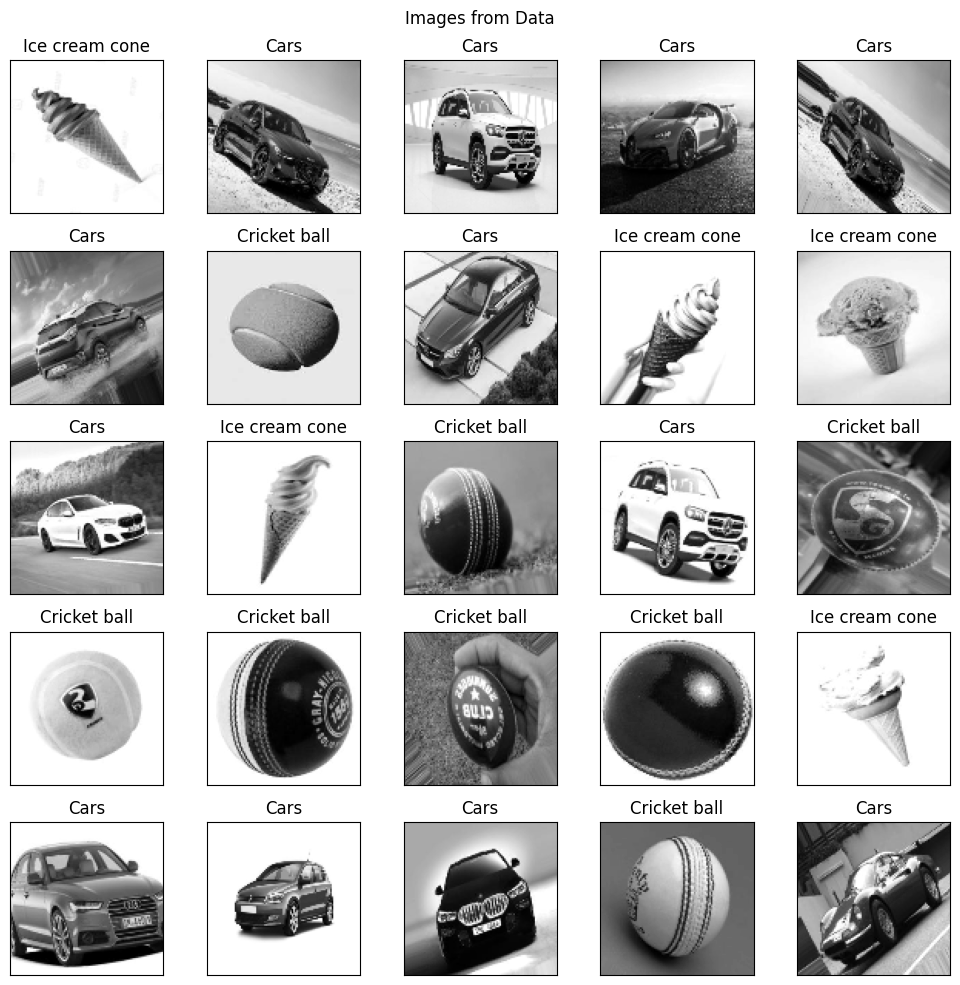

In [8]:
showGridImage(images, labels, gSize=5, title='Images from Data')

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(images, labels, train_size=0.8, random_state=0)

In [10]:
model = LogisticRegression()
model.fit(xTrain, yTrain)

E:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
preds = model.predict(xTest)

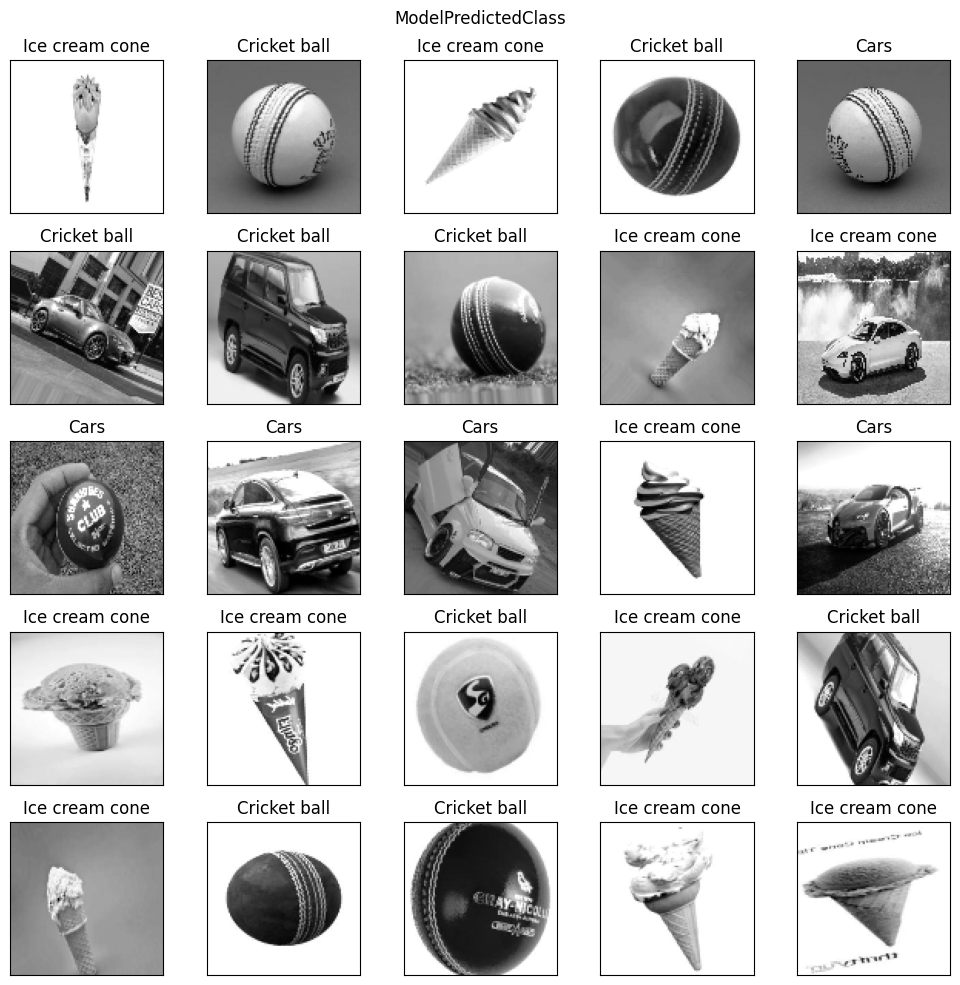

In [12]:
showGridImage(xTest, preds, 5, 'ModelPredictedClass')

In [13]:
accuracy_score(yTest, preds)

0.797979797979798

In [14]:
model.score(xTest, yTest)

0.797979797979798

In [15]:
import pickle 
with open("LogisticRegression.pkl", 'wb') as file:
    pickle.dump(model,file)

In [54]:
cm=confusion_matrix(yTest, preds)
cm

array([[36, 18,  9],
       [ 8, 62,  2],
       [ 1,  2, 60]], dtype=int64)

<Axes: >

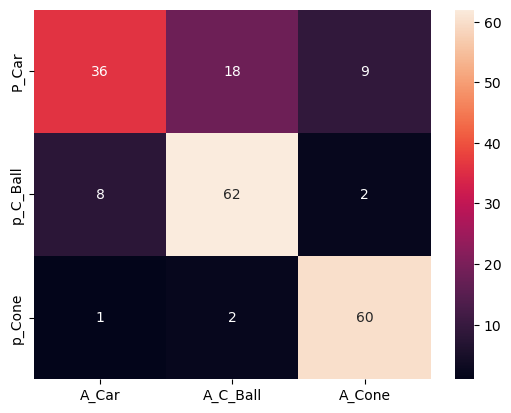

In [57]:
import seaborn as sns
sns.heatmap(cm, annot=True, xticklabels=['A_Car', 'A_C_Ball', 'A_Cone'], yticklabels=['P_Car', 'p_C_Ball', 'p_Cone'])